# Part c and d 

In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 2000
lambda_               = 1e-5
# Hyperparameters from part c, d e and f:
learning_rate = 0.01
n_iterations  = 2000
tolerance     = 1e-10
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.9
epsilon       = 1e-8
lambda_       = 0.001
batch_size    = 32

### Using shared functions to create dataset

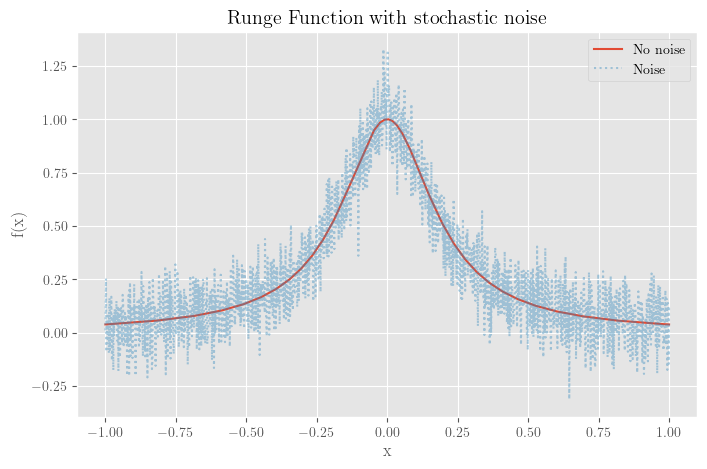

In [2]:
train, test, full = make_data(number_of_data_points, seed)
h = np.linspace(-1,1,number_of_data_points)
funksjon = 1/(1+25*h**2)
x, y = full[0], full[1]

plt.figure(figsize=(8, 5))
plt.plot(h,funksjon, label = "No noise")
plt.plot(x, y, linestyle='dotted', alpha=0.4, label = "Noise")
plt.title('Runge Function with stochastic noise')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [3]:
# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

In [12]:
#X_train = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_train)
#X_test  = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_test)

In [13]:
# # Create polynomial features
# poly = PolynomialFeatures(degree=polynomial_degree, include_bias=True)
# X_train_poly = poly.fit_transform(x_train)  # Transform training data
# X_test_poly  = poly.transform(x_test)       # Transform test data

# # Scale the polynomial features
# scaler = StandardScaler(with_mean=False)  # or with_mean=True depending on your needs
# scaler.fit(X_train_poly)  # Fit scaler only on training data
# x_train_scaled = scaler.transform(X_train_poly)  # Scale training data
# x_test_scaled  = scaler.transform(X_test_poly)   # Scale test data

In [14]:
# X_train = x_train_scaled
# X_test = x_test_scaled

In [4]:
#Scaling the full data, the training and the test set separately
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test,  polynomial_degree, intercept=True)

#x_all_s   = my_scaler(x_all)

#scaler = StandardScaler(with_mean=False)  # or with_mean=True depending on your needs
#scaler.fit(x_train)
#x_train_s = scaler.transform(x_train)
#x_test_s  = scaler.transform(x_test)
#x_all_s   = scaler.transform(x)

# Making a design matrix based of the scaled data


**Scaling makes the x-values not between -1 and 1! I get wierd results from this. Don't understand!**

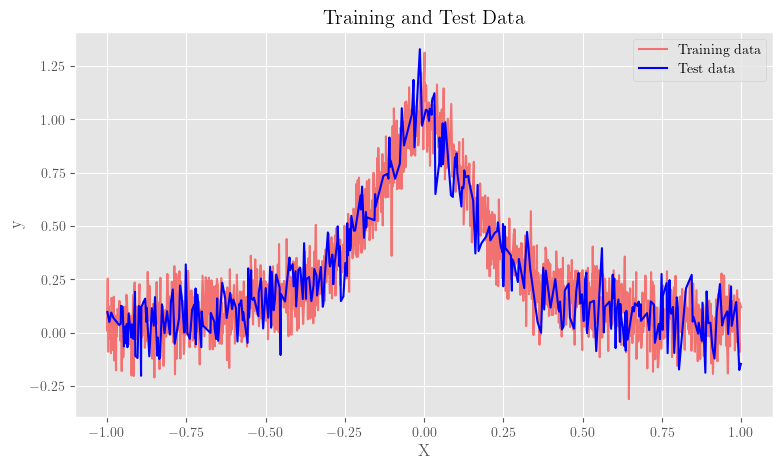

In [5]:
# Plot training data and test data, as lines, but then need to sort x first
# Sort the training data for plotting
sorted_indices_train = np.argsort(x_train.flatten())
x_train_sorted = x_train[sorted_indices_train]
y_train_sorted = y_train[sorted_indices_train]  
# Sort the test data for plotting
sorted_indices_test = np.argsort(x_test.flatten())
x_test_sorted = x_test[sorted_indices_test]
y_test_sorted = y_test[sorted_indices_test]
# Plot
plt.figure(figsize=(9, 5))
plt.plot(x_train_sorted, y_train_sorted, color='red', label='Training data', alpha=0.5)
plt.plot(x_test_sorted,  y_test_sorted,  color='blue',  label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()


## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

In [ ]:
# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)
# Print results
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
print()
# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
beta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ridge = X_test @ beta_gd_ridge
mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
# Print results
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")
# Gradient descent solution for Lasso
beta_gd_lasso, cost_history_lasso = gradient_descent_lasso(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_lasso = X_test @ beta_gd_lasso
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)
# Print results
print(f"Lasso Gradient Descent:    MSE = {mse_gd_lasso:.6f}, R2 = {r2_gd_lasso:.6f}")

OLS Analytical Solution : MSE = 0.000026, R2 = 0.879001
OLS Gradient Descent    : MSE = 0.000105, R2 = 0.515240

Ridge Analytical Solution: MSE = 0.000034, R2 = 0.843858
Ridge Gradient Descent:    MSE = 0.000105, R2 = 0.512719
Ridge Analytical Solution: MSE = 0.000034, R2 = 0.843858
Ridge Gradient Descent:    MSE = 0.000105, R2 = 0.512719


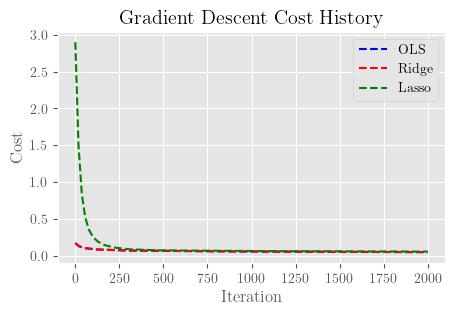

In [18]:
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ols,   color='blue', label='OLS',  linestyle='--')
plt.plot(cost_history_ridge, color='red', label='Ridge', linestyle='--')
plt.plot(cost_history_lasso, color='Green', label='Lasso', linestyle='--')
plt.title("Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

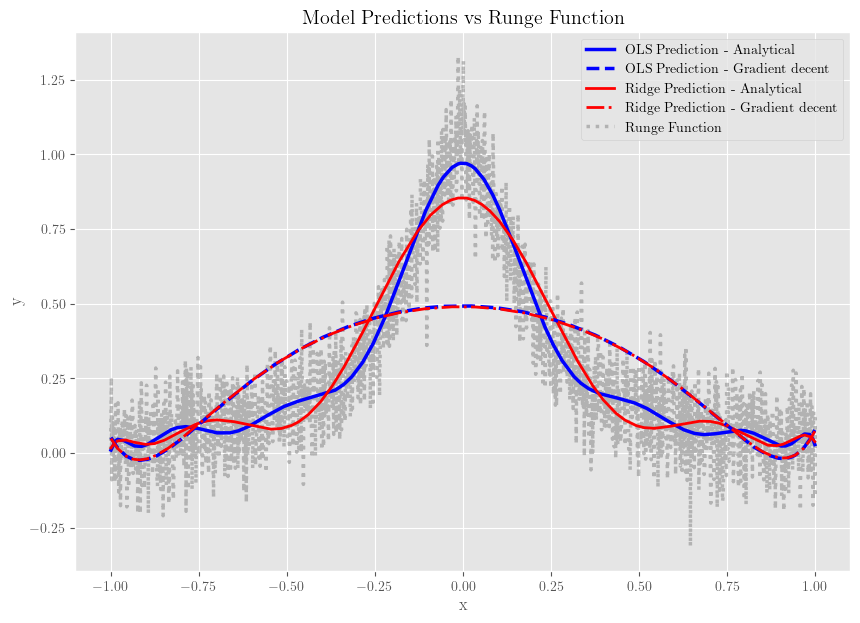

In [8]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],      color='blue', label='OLS Prediction - Analytical',       zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices],   color='blue', label='OLS Prediction - Gradient decent',  zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices],    color='red', label='Ridge Prediction - Analytical',      zorder=5, linewidth=2)
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='Ridge Prediction - Gradient decent', zorder=8, linewidth=2, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
plt.legend()
plt.show()

## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [9]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [10]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=0.2, tol=tolerance, use_tol=True, beta=beta, beta1=0.9, beta2=0.999, epsilon=epsilon, lambda_=lambda_,n_epochs=100)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=0.2, tol=tolerance, use_tol=True, beta=beta, beta1=0.9, beta2=0.999, epsilon=epsilon, lambda_=lambda_,n_epochs=100)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=0.2, tol=tolerance, use_tol=True, beta=beta, beta1=0.9, beta2=0.999, epsilon=epsilon, lambda_=lambda_,n_epochs=100)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000060, R2 = 0.721158
Ridge : gd: MSE = 0.000068, R2 = 0.684320
Lasso : gd: MSE = 0.000062, R2 = 0.713515

OLS   : momentum: MSE = 0.000060, R2 = 0.723504
Ridge : momentum: MSE = 0.000067, R2 = 0.688737
Lasso : momentum: MSE = 0.000061, R2 = 0.717802

OLS   : adagrad: MSE = 0.000101, R2 = 0.534181
Ridge : adagrad: MSE = 0.000101, R2 = 0.532245
Lasso : adagrad: MSE = 0.000102, R2 = 0.529151

OLS   : rmsprop: MSE = 0.000055, R2 = 0.744754
Ridge : rmsprop: MSE = 0.000081, R2 = 0.625403
Lasso : rmsprop: MSE = 0.000074, R2 = 0.656321

OLS   : adam: MSE = 0.000060, R2 = 0.722912
Ridge : adam: MSE = 0.000067, R2 = 0.687756
Lasso : adam: MSE = 0.000060, R2 = 0.720261



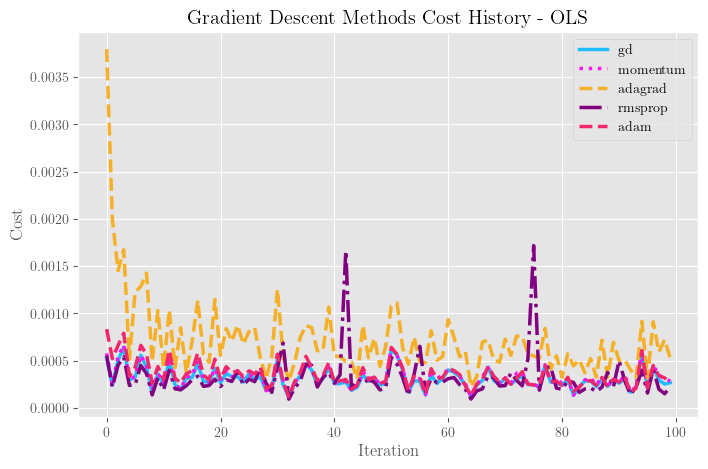

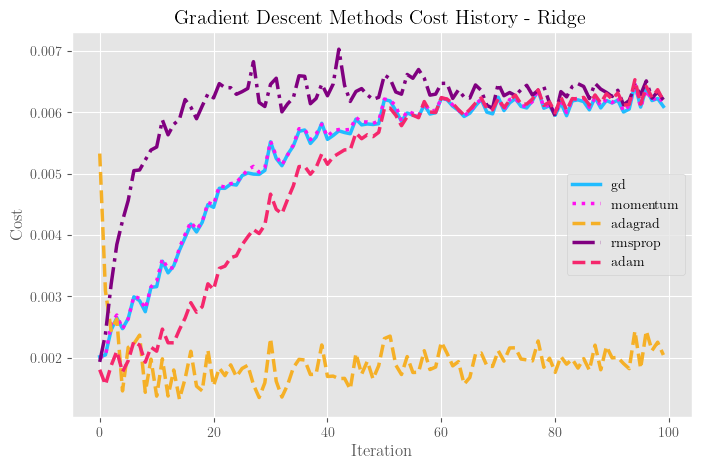

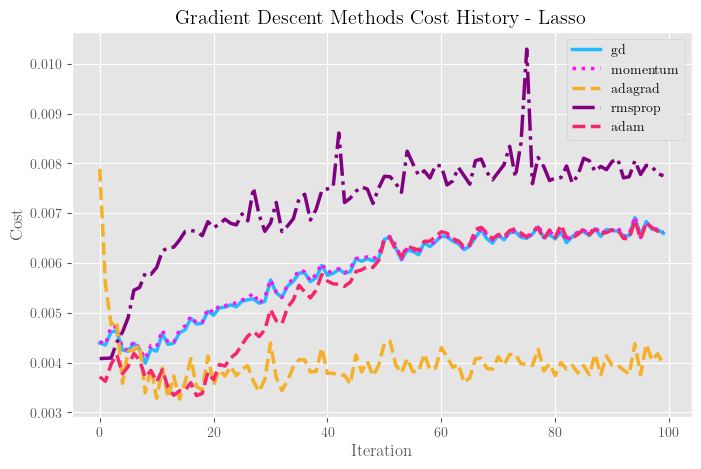

In [11]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

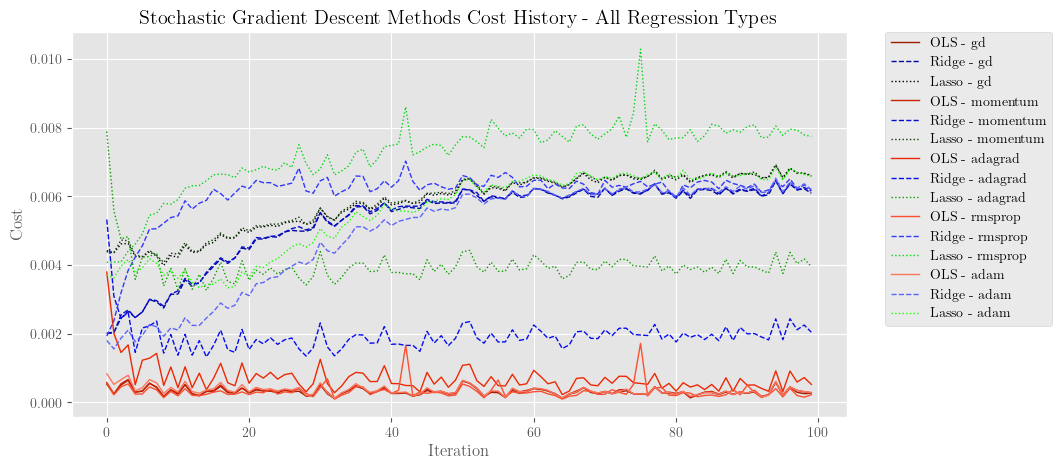

In [14]:
# Same plots for all regression types in one figure, with one linestyles per regression type, and different colors for the different  methods
plt.figure(figsize=(10, 5))
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_Lasso = {'gd': "#000000", 'momentum': "#0B3E00", 'adagrad': "#0D9D00", 'rmsprop': "#00D612", 'adam': "#15FF00"}
for method in methods:
    plt.plot(results[method]['cost_history_OLS'],   label=f'OLS - {method}',   linewidth=1, linestyle='-', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Ridge'], label=f'Ridge - {method}', linewidth=1, linestyle='--', color=colors_Ridge[method])
    plt.plot(results[method]['cost_history_Lasso'], label=f'Lasso - {method}', linewidth=1, linestyle='dotted', color=colors_Lasso[method])
plt.title("Stochastic Gradient Descent Methods Cost History - All Regression Types")
plt.xlabel("Iteration")
plt.ylabel("Cost")  
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

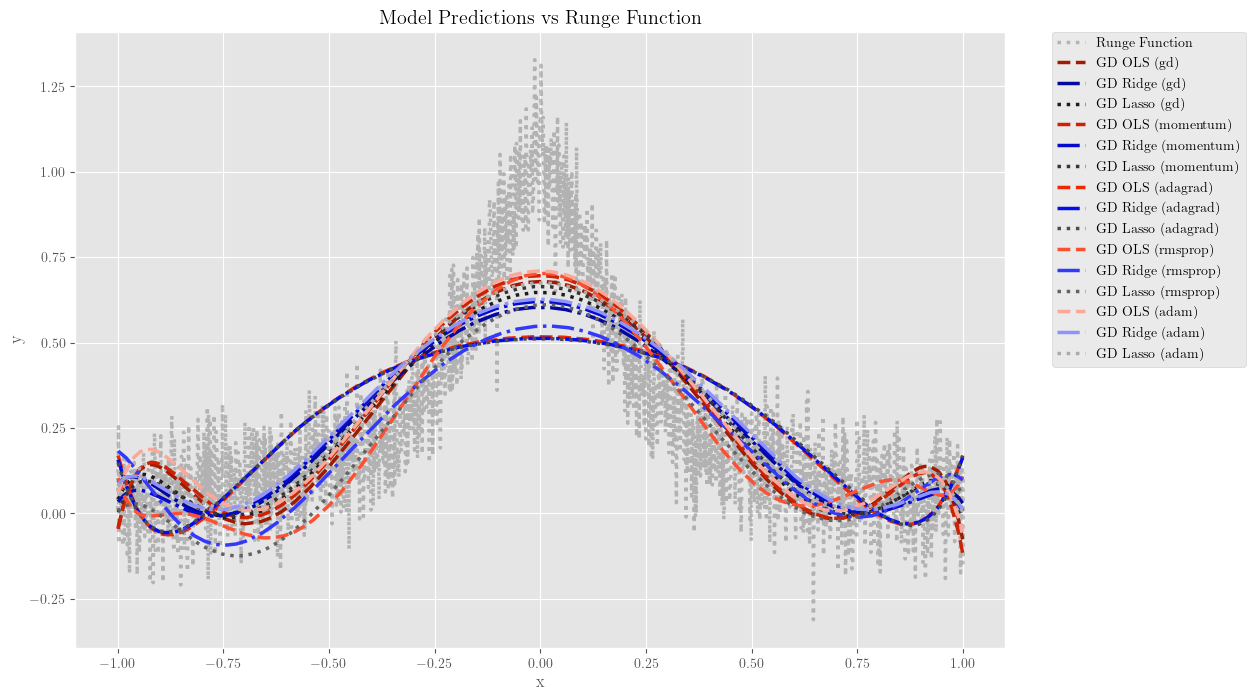

In [15]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(12, 8))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
#plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': "#F9A89A"}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': "#9094FA"}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': "#ABABAB"}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_OLS[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_Ridge[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

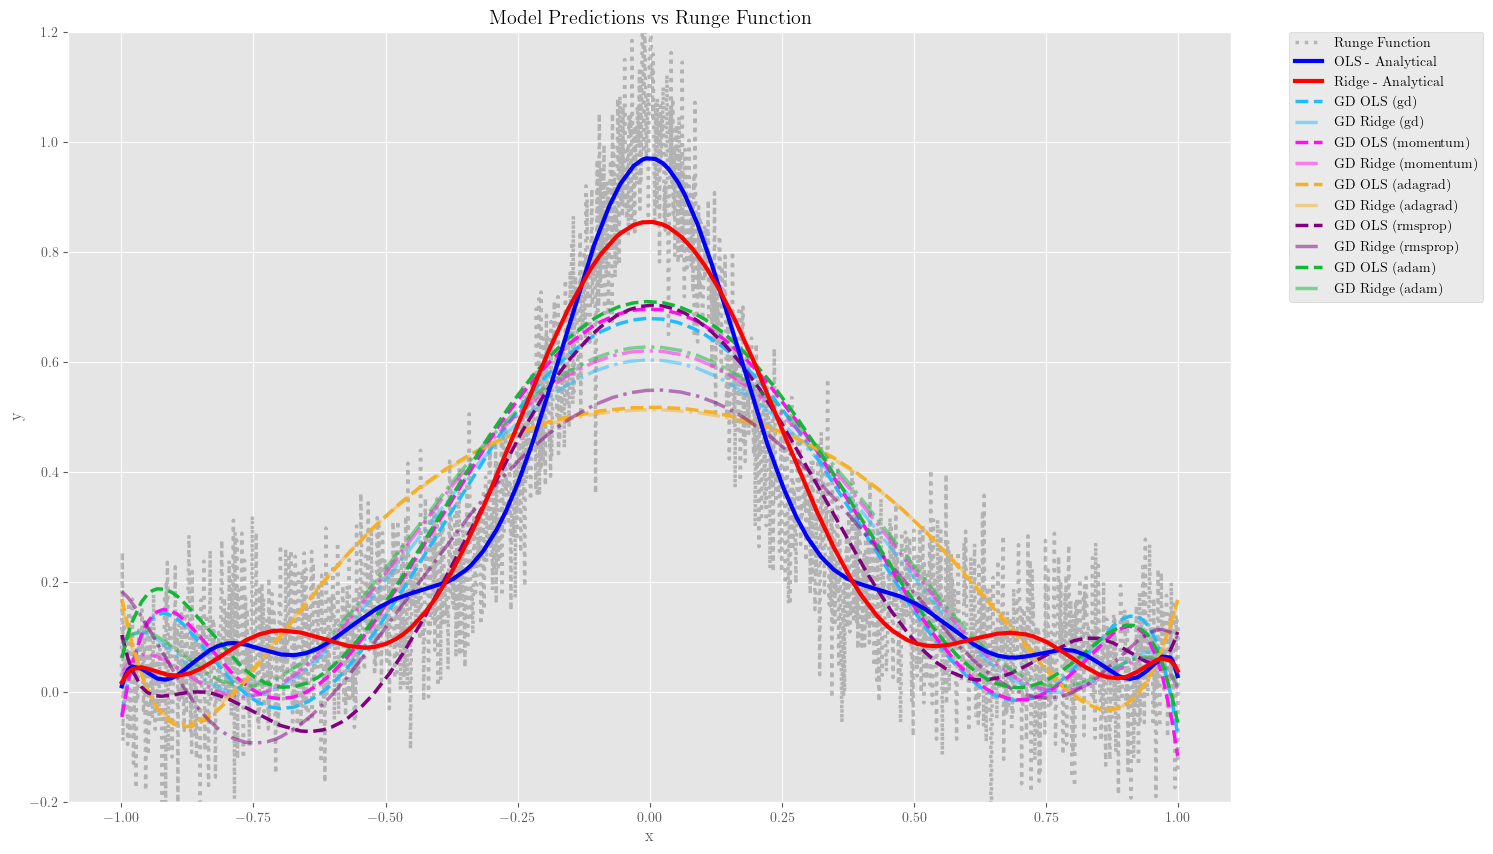

In [16]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(15,10))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': "#13B737"}
#colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_cost_history[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_cost_history[method], alpha=0.5)
    #plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()